Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [2]:
import glob
import os
PATH = os.getcwd()+ "/Data/Experimental_Data/Group_1"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    
# 1
dflist = []
for f in all_files:
    dflist.append(pd.read_csv(f))
df_concatenated = pd.concat(dflist, ignore_index=True)
    
# # 2
# # using generator
# # https://medium.freecodecamp.org/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854
# df_from_each_file = (pd.read_csv(f) for f in all_files) 
# df_concatenated   = pd.concat(df_from_each_file, ignore_index=True)

# a possible solution
pd.set_option('max_rows', 10)
df_concatenated

# save concatenated datafram
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'
if not os.path.exists(DATAPATH):
    os.makedirs(DATAPATH)   
df_concatenated.to_csv(DATAPATH, index=False, encoding='utf8')
                

### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [3]:
# add a column "congruence"
df_concatenated['congruence'] = df_concatenated['StimulusType'] == df_concatenated['response']

# create a new dataframe with averaged data
df_concatenated_avg = df_concatenated.pivot_table(index=["SubjectID","StimulusType"], values=["RT","congruence"],
                                                  aggfunc={'RT': lambda x:np.mean(x[x>0]),"congruence": np.mean})
# reset SubjectID to be a column
df_concatenated_avg.reset_index(level=1, inplace=True)
df_concatenated_avg.reset_index(level=0, inplace=True)
# rename the column
df_concatenated_avg = df_concatenated_avg.rename(index=str, columns={"congruence": "accuracy"})

# save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'   
df_concatenated_avg.to_csv(DATAPATH, index=False, encoding='utf8')

## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

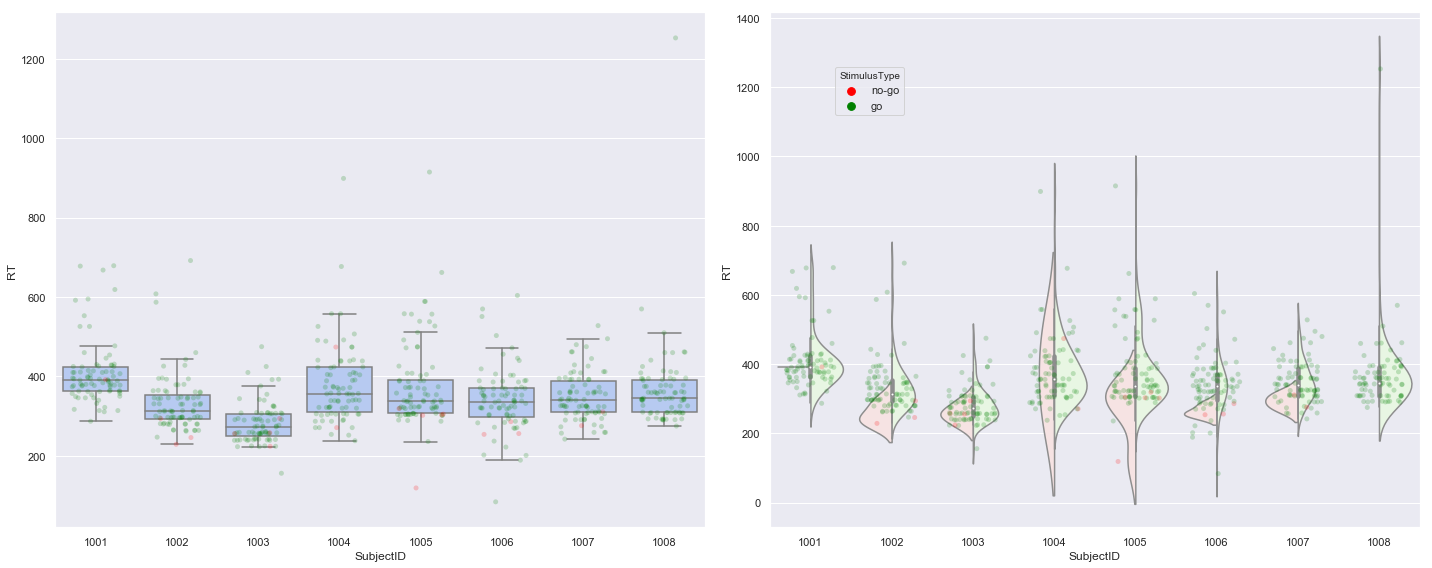

In [4]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")

# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

# first subplot with boxplot
ax0 = sns.stripplot("SubjectID", "RT", "StimulusType", data=data_concat[data_concat["RT"]!=0], 
              jitter=0.3, palette=["red", "green"], alpha=0.2, ax=axes[0]) 
sns.boxplot("SubjectID", "RT", data=data_concat[data_concat["RT"]!=0], 
             palette=["#ADC7FB"], fliersize=0, ax=axes[0]) 

# second subplot with violinplot
sns.stripplot("SubjectID", "RT", "StimulusType", data=data_concat[data_concat["RT"]!=0], 
              jitter=0.3, palette=["red", "green"], alpha=0.2, ax=axes[1]) 
sns.violinplot("SubjectID", "RT", "StimulusType", data=data_concat[data_concat["RT"]!=0],
             palette=["#f9e0e0", "#e7f9e0"], ax=axes[1], split=True) 

# handling legends
handles,labels = ax0.get_legend_handles_labels()
axes[0].get_legend().remove()
plt.legend(handles[0:2], ("no-go","go"), loc=(0.1,0.8), title="StimulusType")

fig.tight_layout()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

/home/minseok/anaconda3/envs/acc/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/minseok/anaconda3/envs/acc/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



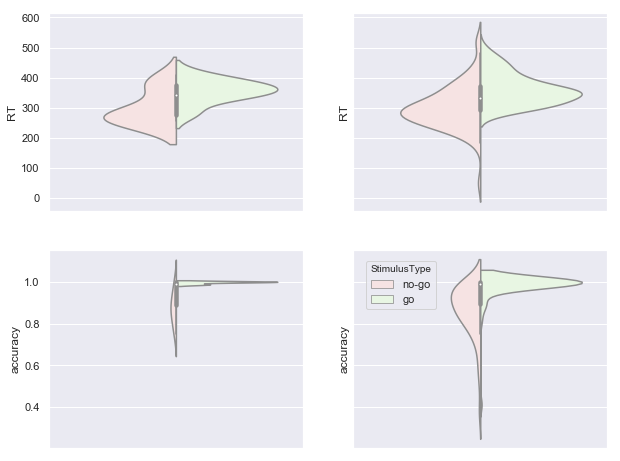

In [5]:
# again make concatenated dataframe over all groups
dflist_groups = [] # list containg of dataframes of 11 groups
# iterate through all group folders
for groupindex in range(1,12):
    PATH = os.getcwd()+ "/Data/Experimental_Data/Group_{}".format(groupindex,groupindex)
    all_files = glob.glob(os.path.join(PATH, "*.csv")) 
    # list containing of dataframes of 8 subjects
    dflist = []
    for subjectindex,f in enumerate(all_files):
        df_single = pd.read_csv(f)
        df_single["SubjectID"] = str(groupindex)+"00"+str(subjectindex) # renaming SubjectID
        dflist.append(df_single)
    # make a dataframe out of dflist
    df_subs = pd.concat(dflist, ignore_index=True)
    dflist_groups.append(df_subs)
df_all = pd.concat(dflist_groups, ignore_index=True)

# Computing average values for each subject
df_all['congruence'] = df_all['StimulusType'] == df_all['response']
df_all_avg = df_all.pivot_table(index=["SubjectID","StimulusType"], values=["RT","congruence"],
                aggfunc={'RT': lambda x:np.mean(x[x>0]),"congruence": np.mean}) #aggfunc to control RT=0
df_all_avg.reset_index(level=1, inplace=True)
df_all_avg.reset_index(level=0, inplace=True)
df_all_avg = df_all_avg.rename(index=str, columns={"congruence": "accuracy"})

# plotting
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8),sharey="row")
# violin plot for your group's data
data_yourgroup = pd.read_csv(os.getcwd() + "/Processed/data_concatenated_averaged.csv".format(groupindex))
ax00 = sns.violinplot(x=[""]*len(data_yourgroup), y="RT", hue="StimulusType", data=data_yourgroup,
               palette=["#f9e0e0", "#e7f9e0"], split=True, ax=axes[0,0]) 
ax10 = sns.violinplot(x=[""]*len(data_yourgroup), y="accuracy", hue="StimulusType", data=data_yourgroup,
               palette=["#f9e0e0", "#e7f9e0"], split=True, ax=axes[1,0]) 

# violin plot of all group's data
ax01 = sns.violinplot(x=[""]*len(df_all_avg), y="RT", hue="StimulusType", data=df_all_avg,
               palette=["#f9e0e0", "#e7f9e0"], split=True, ax=axes[0,1]) 
sns.violinplot(x=[""]*len(df_all_avg), y="accuracy", hue="StimulusType", data=df_all_avg,
               palette=["#f9e0e0", "#e7f9e0"], split=True, ax=axes[1,1])

# handling legends
axes[0,0].get_legend().remove()
axes[1,0].get_legend().remove()
handles, labels = ax01.get_legend_handles_labels()
axes[0,1].get_legend().remove()
plt.legend(handles[0:2], ("no-go","go"), loc=(0.05,0.7), title="StimulusType")


Compare two datasets and relate it with CLT. Write your opinion here.

CLT states that the mean of sampled independent random variables will approximate a normal distrbution given sufficiently larger number of sampling. This effect does not depend on distribution of the random variable.  
This means 

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

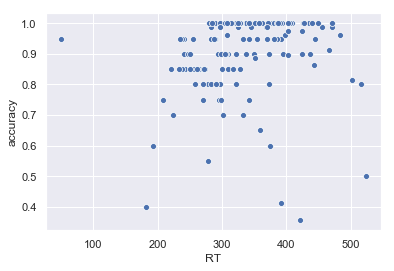

In [6]:
sns.scatterplot("RT","accuracy",data=df_all_avg)

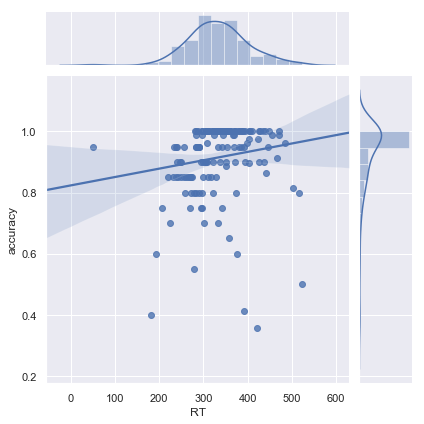

In [7]:
sns.jointplot("RT", "accuracy", data=df_all_avg, kind="reg")